<a href="https://colab.research.google.com/github/MercySamoei/randoms/blob/main/FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = load_wine()

In [ ]:
data = pd.DataFrame(df.data, columns=df.feature_names)

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


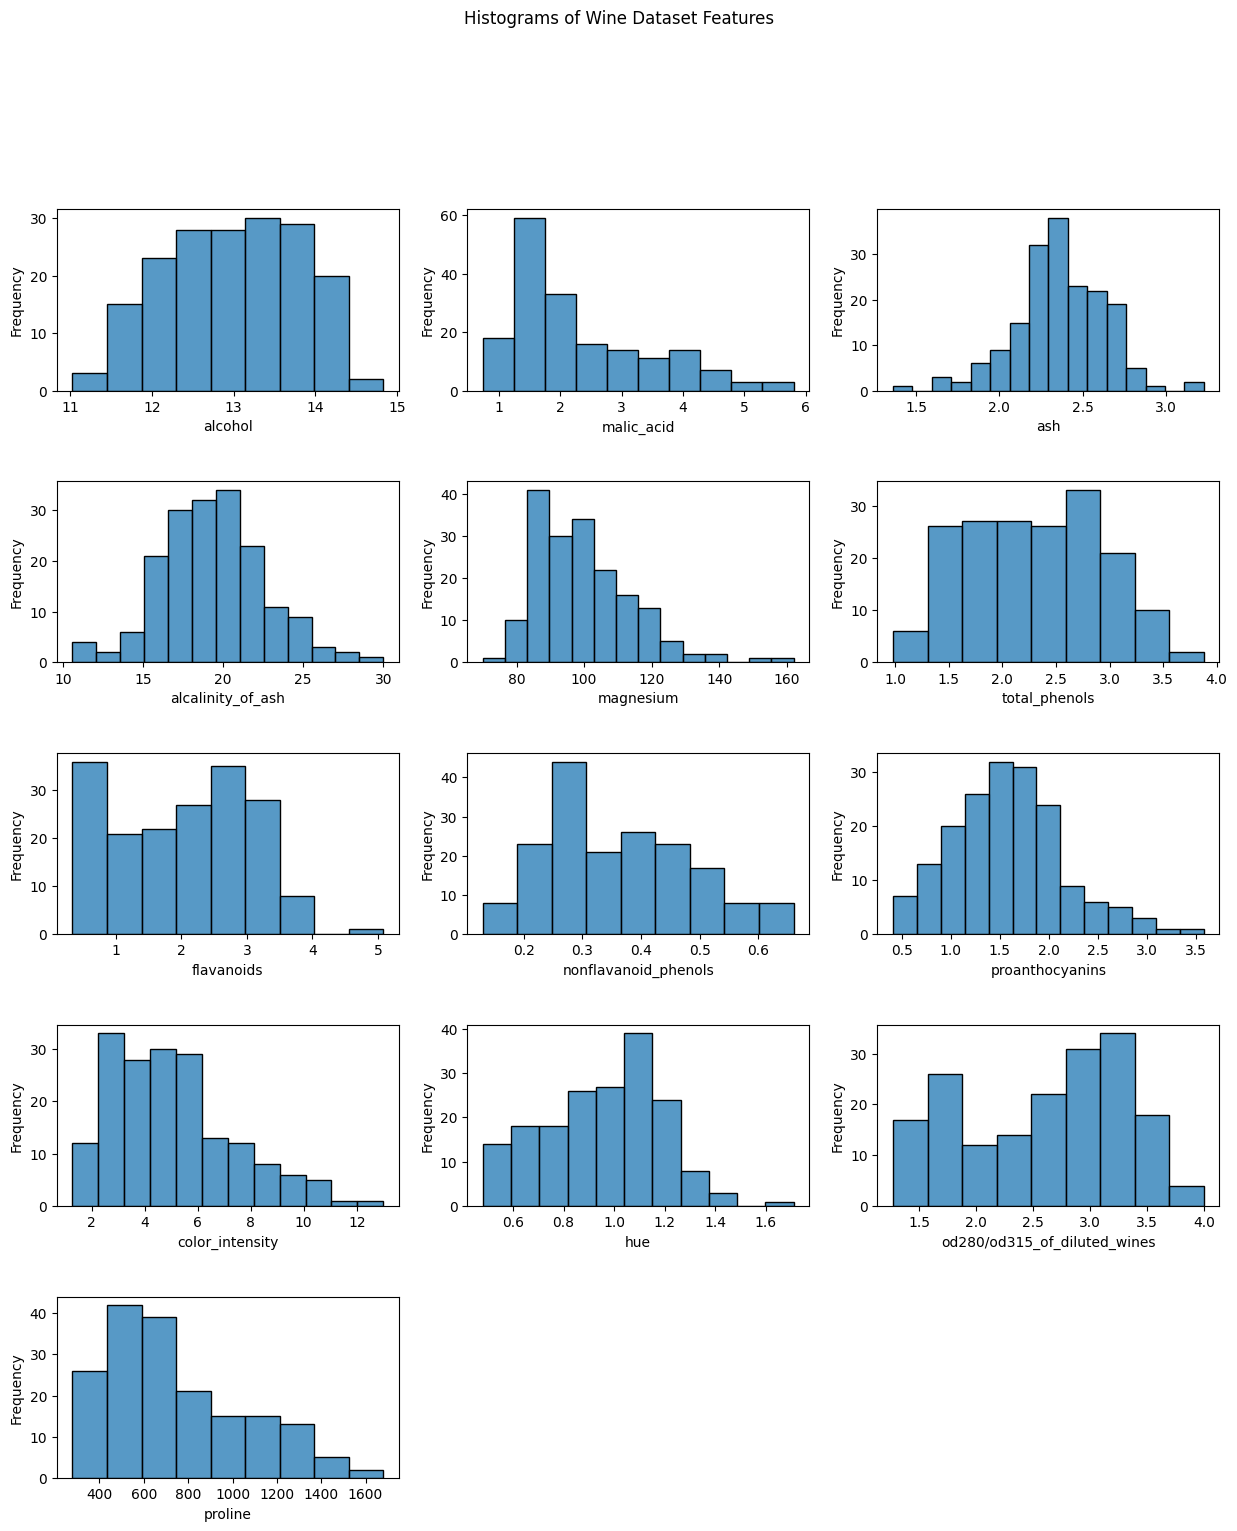

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)  

for ax, column in zip(axes.flatten(), data.columns):
    sns.histplot(data=data, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if len(data.columns) < len(axes.flatten()):
    for i in range(len(data.columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

fig.suptitle('Histograms of Wine Dataset Features')

plt.show()


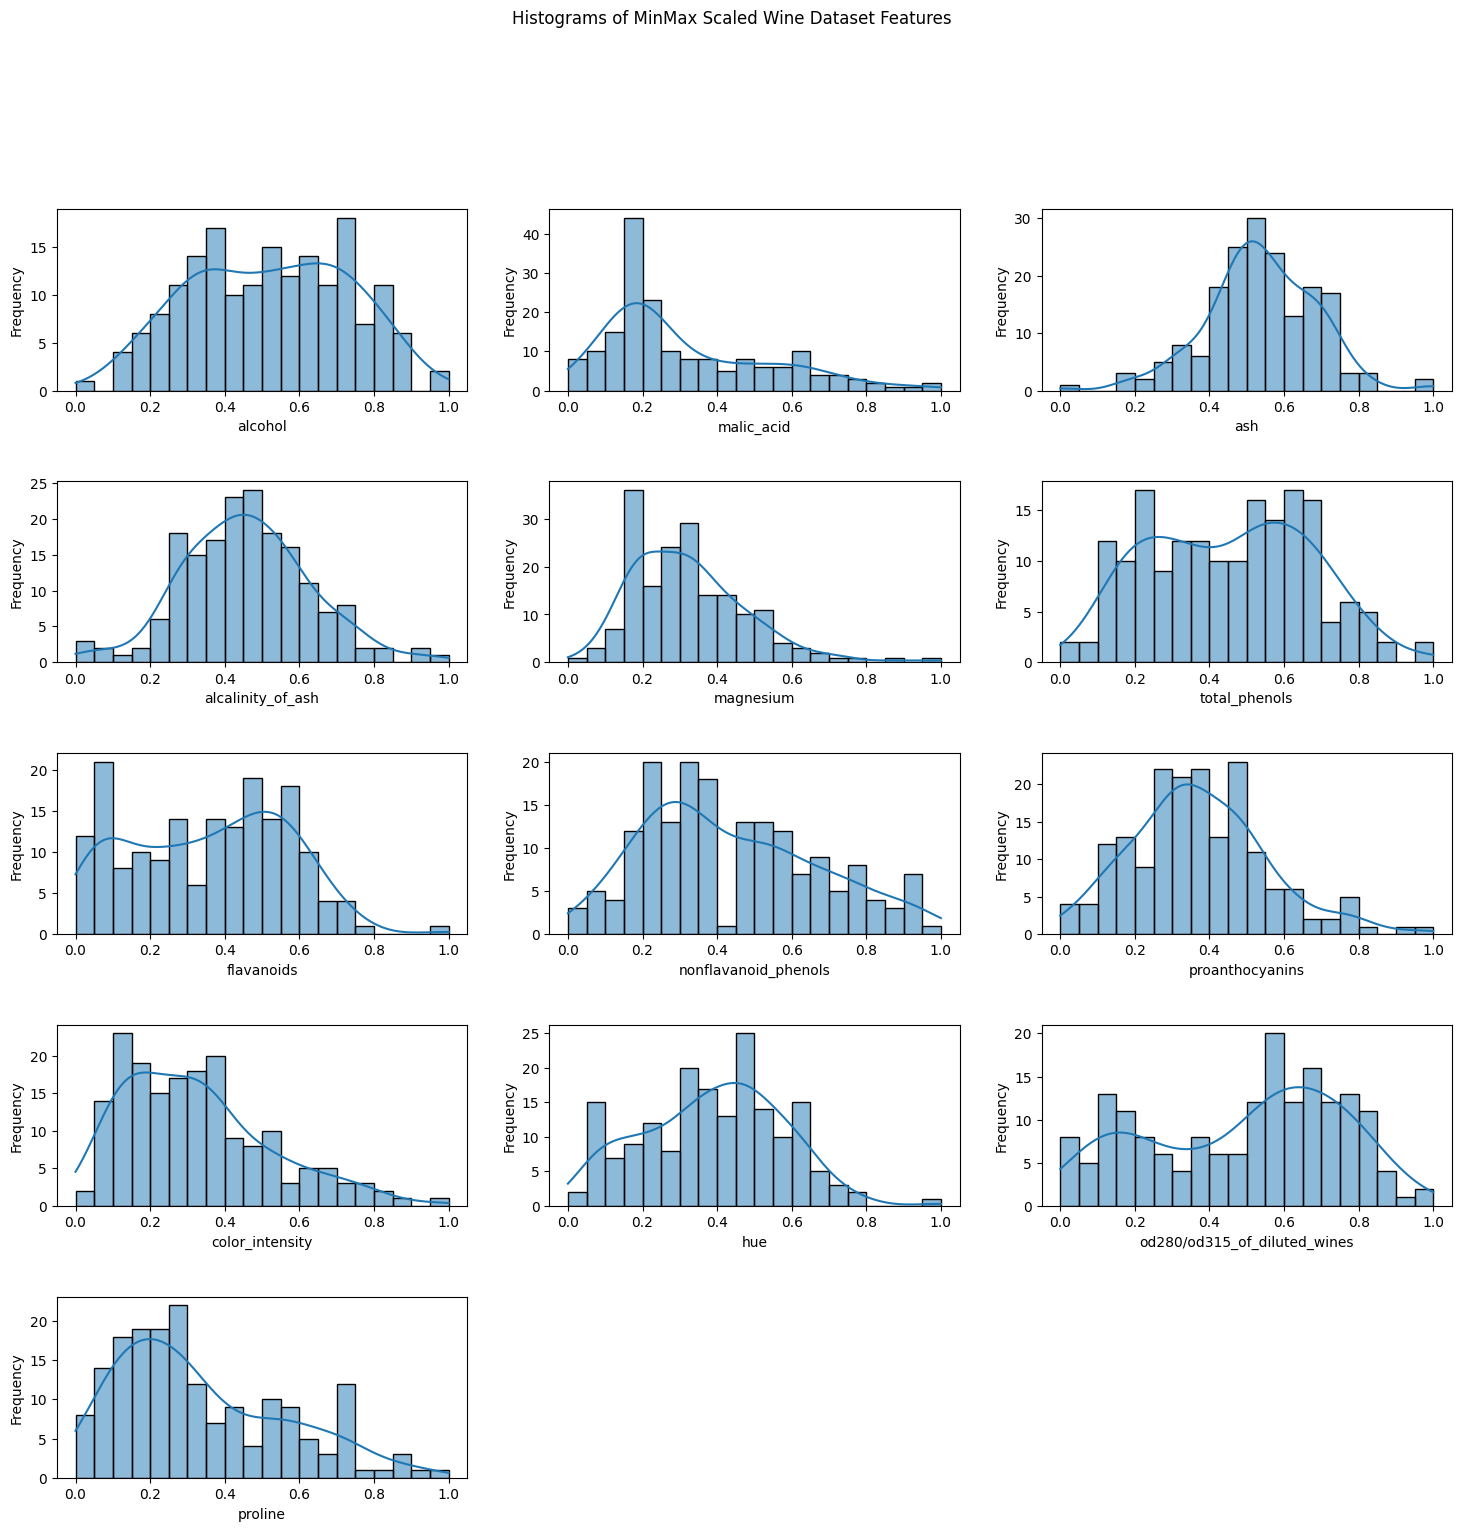

In [ ]:
scaler = MinMaxScaler()
min_max_scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5)  
for ax, column in zip(axes.flatten(), min_max_scaled_data.columns):
    sns.histplot(data=min_max_scaled_data, x=column, ax=ax, bins=20, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if len(data.columns) < len(axes.flatten()):
    for i in range(len(data.columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

fig.suptitle('Histograms of MinMax Scaled Wine Dataset Features')
plt.show()

In [ ]:
min_max_scaled_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=scaled_data)
# plt.title('Boxplot of Scaled Wine Dataset')
# plt.xlabel('Features')
# plt.ylabel('Scaled Values')
# plt.show()


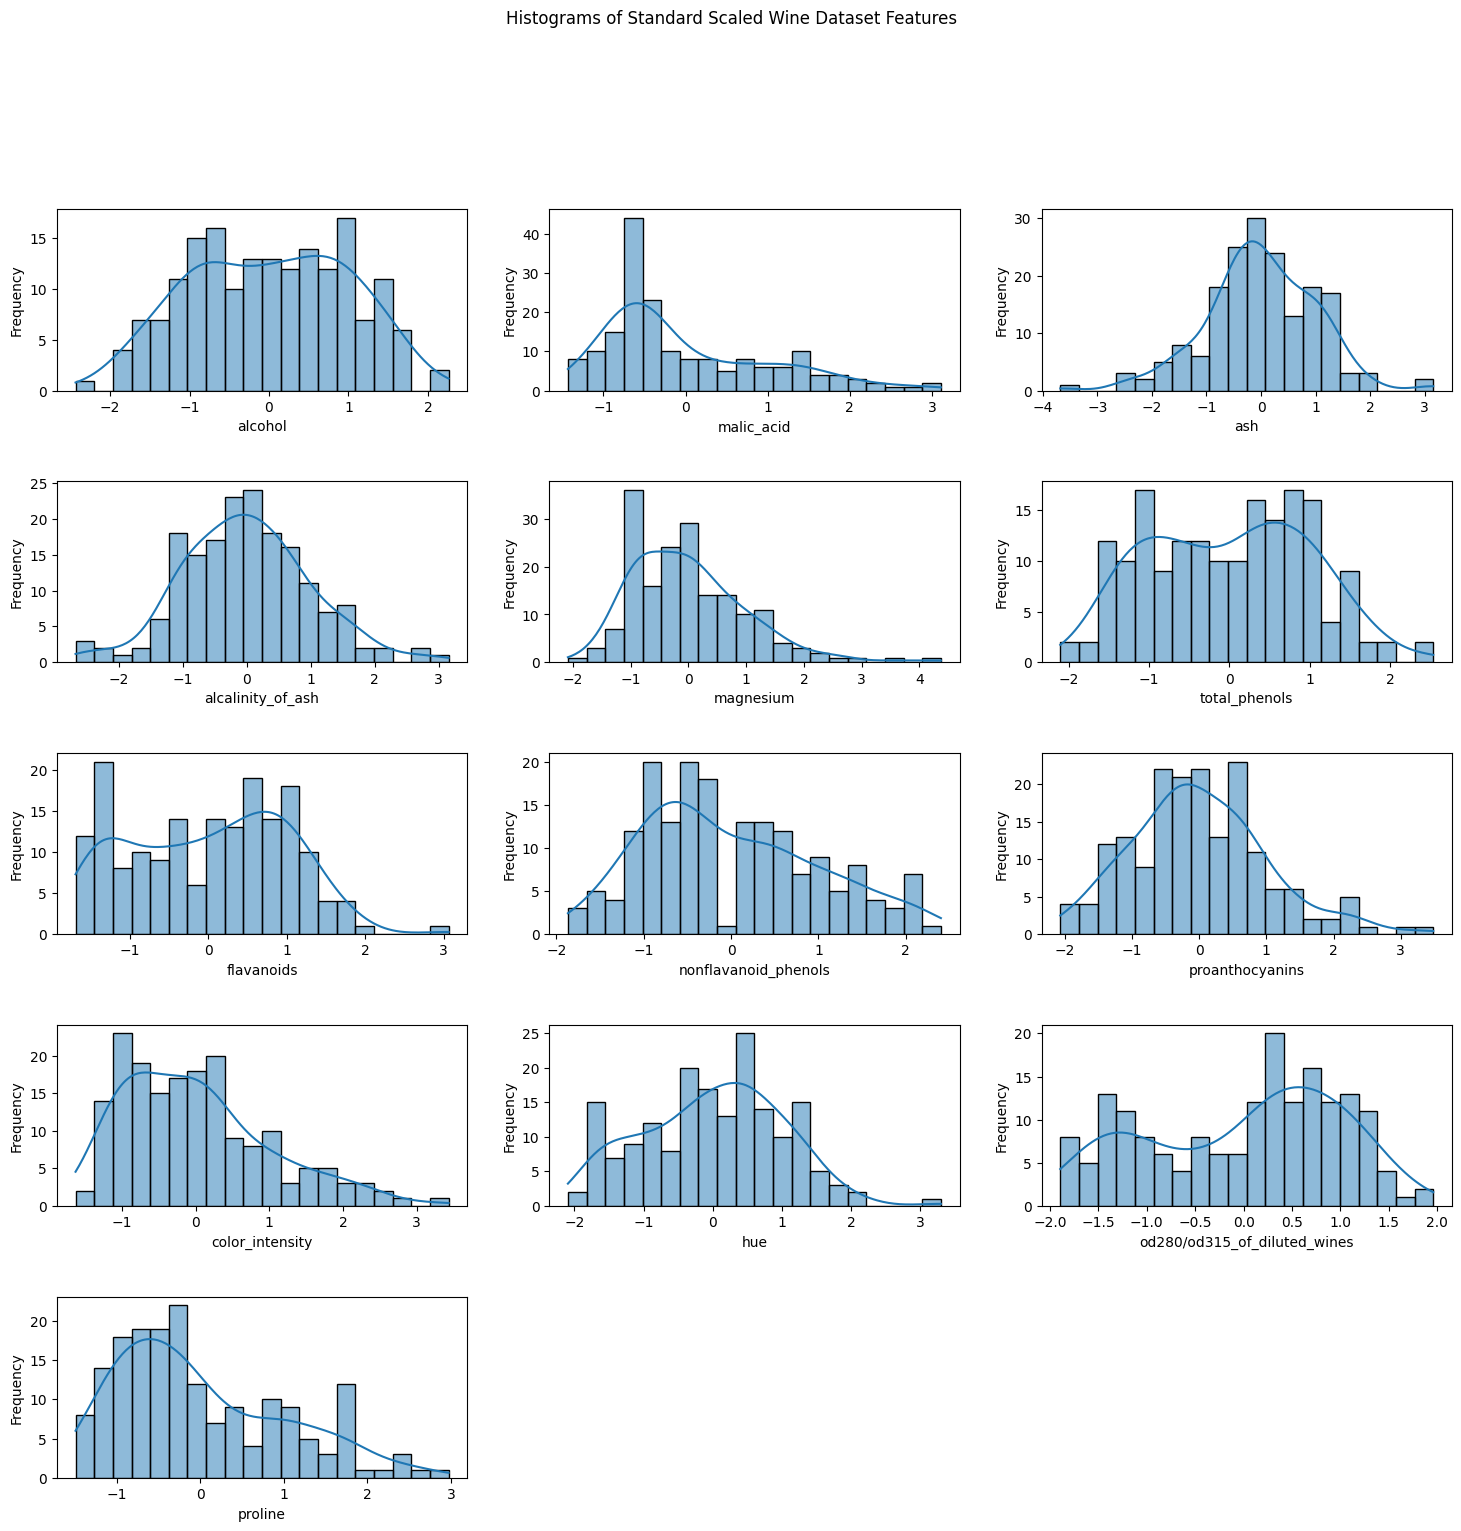

In [ ]:
scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5) 
for ax, column in zip(axes.flatten(), standard_scaled_data.columns):
    sns.histplot(data=standard_scaled_data, x=column, ax=ax, bins=20, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    
if len(data.columns) < len(axes.flatten()):
    for i in range(len(data.columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

fig.suptitle('Histograms of Standard Scaled Wine Dataset Features')
plt.show()


In [ ]:
standard_scaled_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


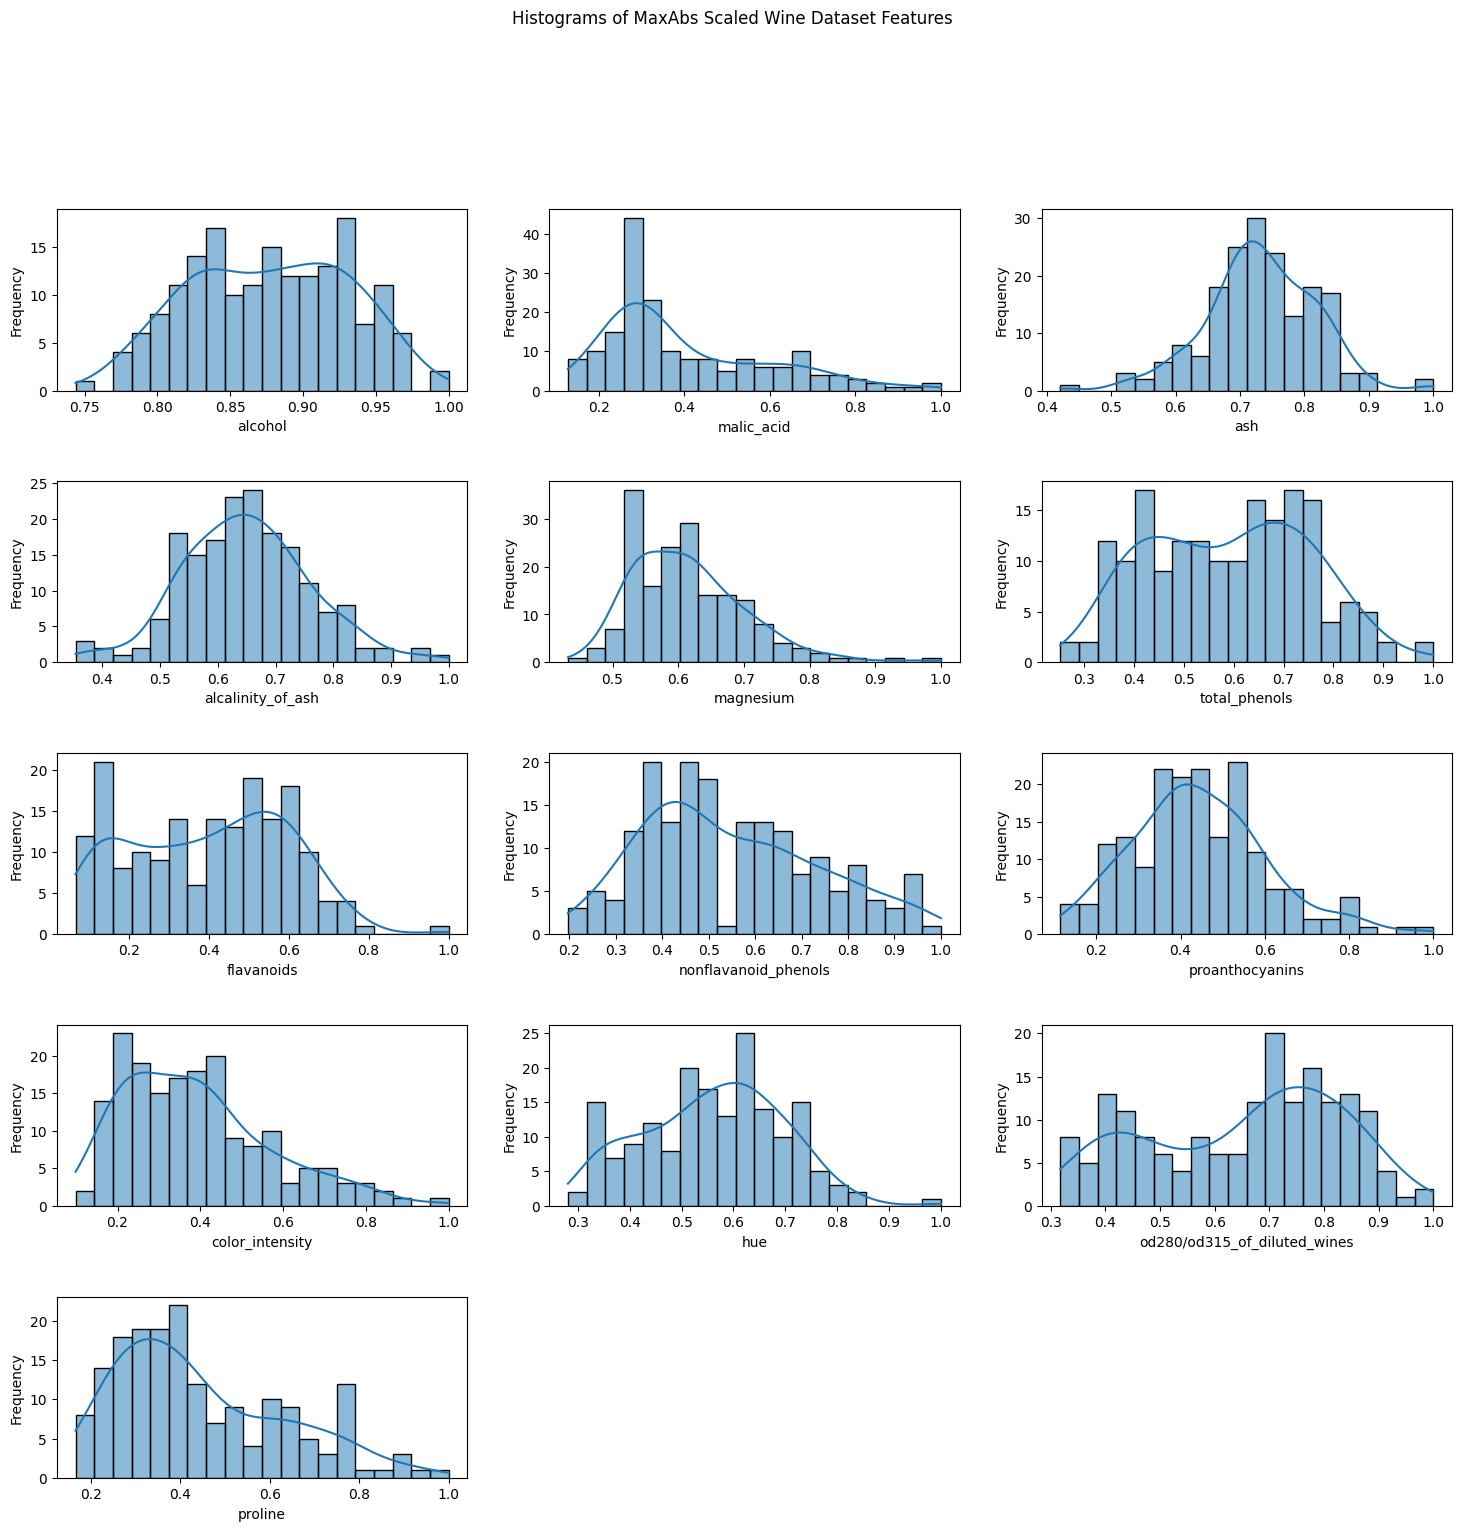

In [ ]:

scaler = MaxAbsScaler()
max_abs_scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5)  
for ax, column in zip(axes.flatten(), max_abs_scaled_data.columns):
    sns.histplot(data=max_abs_scaled_data, x=column, ax=ax, bins=20, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if len(data.columns) < len(axes.flatten()):
    for i in range(len(data.columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

fig.suptitle('Histograms of MaxAbs Scaled Wine Dataset Features')
plt.show()


In [ ]:
max_abs_scaled_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.876643,0.402819,0.732668,0.649831,0.615689,0.591524,0.399463,0.548264,0.444385,0.389084,0.559912,0.652921,0.444579
std,0.054742,0.192611,0.084936,0.111319,0.088163,0.161302,0.196626,0.188566,0.159877,0.178330,0.133668,0.177498,0.187445
min,0.743763,0.127586,0.421053,0.353333,0.432099,0.252577,0.066929,0.196970,0.114525,0.098462,0.280702,0.317500,0.165476
25%,0.833614,0.276293,0.684211,0.573333,0.543210,0.449098,0.237205,0.409091,0.349162,0.247692,0.457602,0.484375,0.297917
50%,0.879973,0.321552,0.730650,0.650000,0.604938,0.606959,0.420276,0.515152,0.434358,0.360769,0.564327,0.695000,0.400893
75%,0.922286,0.531466,0.791796,0.716667,0.660494,0.721649,0.565945,0.662879,0.544693,0.476923,0.654971,0.792500,0.586310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


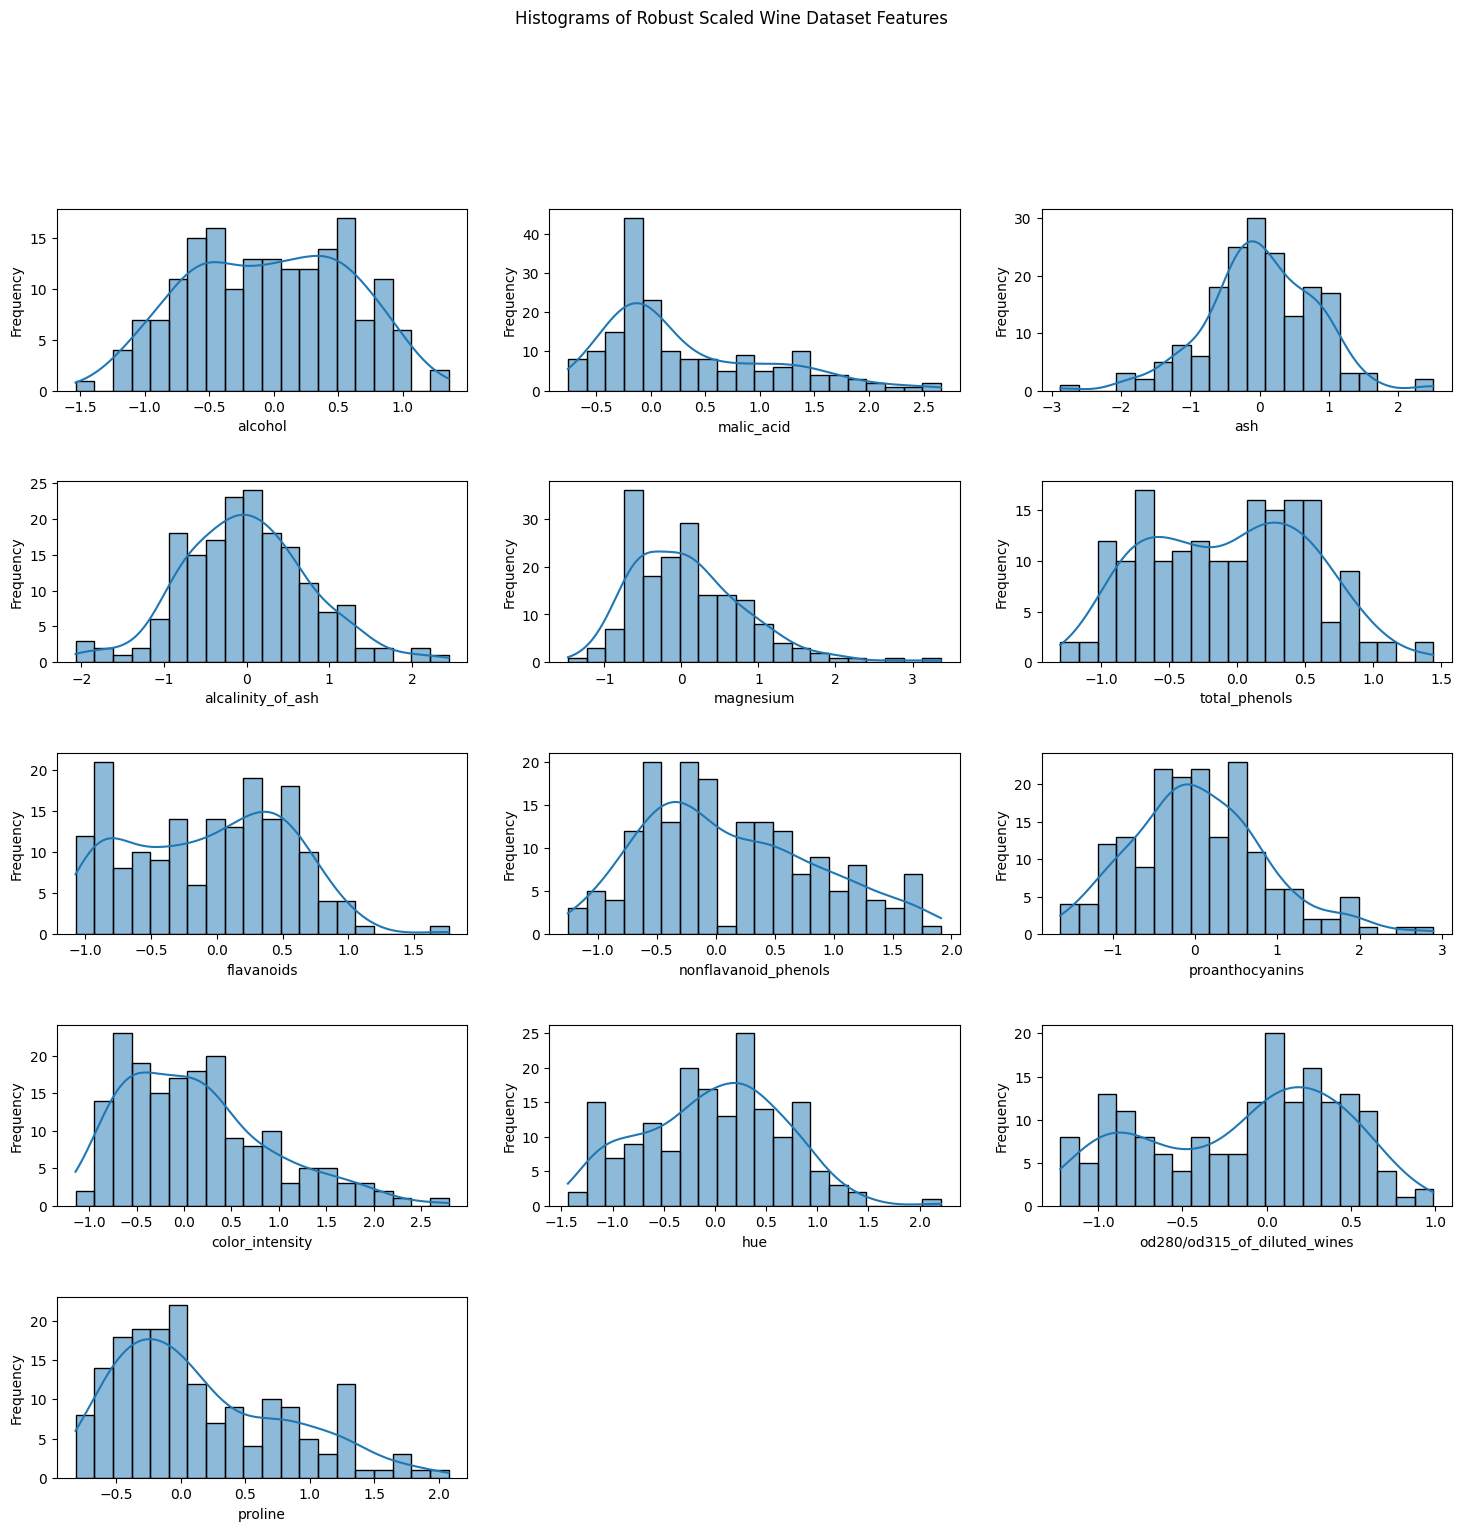

In [ ]:
scaler = RobustScaler()
robust_scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5)  
for ax, column in zip(axes.flatten(), robust_scaled_data.columns):
    sns.histplot(data=robust_scaled_data, x=column, ax=ax, bins=20, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

if len(data.columns) < len(axes.flatten()):
    for i in range(len(data.columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

fig.suptitle('Histograms of Robust Scaled Wine Dataset Features')
plt.show()


In [ ]:
robust_scaled_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,-0.037553,3.184786e-01,0.018754,-0.001176,0.091662,-0.056631,-6.331158e-02,0.130471,5.128411e-02,1.235201e-01,-0.022372,-0.136564,0.151482
std,0.617359,7.548284e-01,0.789479,0.776643,0.751710,0.591821,5.981190e-01,0.743005,8.176555e-01,7.779483e-01,0.677249,0.576057,0.649964
min,-1.536122,-7.601351e-01,-2.877698,-2.069767,-1.473684,-1.300236,-1.074850e+00,-1.253731,-1.635714e+00,-1.144295e+00,-1.437037,-1.225152,-0.816305
25%,-0.522814,-1.773649e-01,-0.431655,-0.534884,-0.526316,-0.579196,-5.568862e-01,-0.417910,-4.357143e-01,-4.932886e-01,-0.540741,-0.683570,-0.357069
50%,0.000000,-7.502679e-17,0.000000,0.000000,0.000000,0.000000,1.327063e-16,0.000000,-1.587272e-16,1.491862e-16,0.000000,0.000000,0.000000
75%,0.477186,8.226351e-01,0.568345,0.465116,0.473684,0.420804,4.431138e-01,0.582090,5.642857e-01,5.067114e-01,0.459259,0.316430,0.642931
max,1.353612,2.658784e+00,2.503597,2.441860,3.368421,1.442080,1.763473e+00,1.910448,2.892857e+00,2.788591e+00,2.207407,0.989858,2.077399
